Importing all needed Python modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
import datetime
from datetime import datetime

In [3]:
# Used to execute multple code lines in a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Used to display dataframes horizontally (instead of vertically)
# NOT USED! Instead I used the solution here:
# https://stackoverflow.com/a/50899244
#
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

Importing Raw Data Files

In [5]:
ffx = pd.read_csv("ffxLighting_original_june28.txt")

In [6]:
ffx2 = pd.read_csv("ffxLighting_new_july1.txt")

In [7]:
ffx3 = pd.read_csv("gray_file_july1.txt")

Initial Look At The Data

In [8]:
ffx.head()
ffx2.head()
ffx3.head()

,count,timings
0,1,2020-06-28 16:40:11.538763
1,2,2020-06-28 16:40:17.543537
2,3,2020-06-28 16:40:28.666688
3,4,2020-06-28 16:40:34.640885
4,5,2020-06-28 16:40:45.889237


,count,timings
0,1,2020-07-01 22:18:22.806651
1,2,2020-07-01 22:18:49.157322
2,3,2020-07-01 22:18:55.197844
3,4,2020-07-01 22:19:06.378970
4,5,2020-07-01 22:19:12.418819


,grayscale,timings
0,235.556693,2020-07-01 22:18:21.991453
1,235.544079,2020-07-01 22:18:22.187393
2,229.834134,2020-07-01 22:18:22.202118
3,229.882272,2020-07-01 22:18:22.219390
4,229.889206,2020-07-01 22:18:22.234170


In [9]:
ffx["count"][0]
ffx[" timings"][0]

1

' 2020-06-28 16:40:11.538763'

In [10]:
type(ffx["count"][0])
type(ffx[" timings"][0])

numpy.int64

str

In [11]:
ffx2["count"][0]
ffx2[" timings"][0]

1

' 2020-07-01 22:18:22.806651'

In [12]:
ffx3["grayscale"][0]
ffx3[" timings"][0]

235.55669270833332

' 2020-07-01 22:18:21.991453'

Getting General Info About Raw Data (NOTE: The Stupid Space!!!)

In [13]:
ffx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   count     1135 non-null   int64 
 1    timings  1135 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.9+ KB


In [14]:
ffx2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859 entries, 0 to 1858
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   count     1859 non-null   int64 
 1    timings  1859 non-null   object
dtypes: int64(1), object(1)
memory usage: 29.2+ KB


In [15]:
ffx3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399539 entries, 0 to 399538
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   grayscale  399539 non-null  float64
 1    timings   399539 non-null  object 
dtypes: float64(1), object(1)
memory usage: 6.1+ MB


In [16]:
# All date/time column data is "str" !!!
type(ffx[" timings"][0])
type(ffx2[" timings"][0])
type(ffx3[" timings"][0])

str

str

str

# **Cleaning Data for ffx (original data)**

Need to first get rid of the stupid space (in column header)!

In [17]:
ffx.head()
ffx.columns
ffx[" timings"][0]

,count,timings
0,1,2020-06-28 16:40:11.538763
1,2,2020-06-28 16:40:17.543537
2,3,2020-06-28 16:40:28.666688
3,4,2020-06-28 16:40:34.640885
4,5,2020-06-28 16:40:45.889237


Index(['count', ' timings'], dtype='object')

' 2020-06-28 16:40:11.538763'

In [18]:
ffx.rename(mapper={" timings": "timings"}, axis=1, inplace=True)
ffx.columns

Index(['count', 'timings'], dtype='object')

Need to get rid of spaces in the "timings" DATA as well!!!

In [19]:
ffx["timings"][0]
type(ffx["timings"][0])

' 2020-06-28 16:40:11.538763'

str

In [20]:
ffx["timings"] = ffx["timings"].apply(lambda string: string[1:])

In [21]:
ffx["timings"][0]
type(ffx["timings"][0])

'2020-06-28 16:40:11.538763'

str

In [22]:
ffx.head()

,count,timings
0,1,2020-06-28 16:40:11.538763
1,2,2020-06-28 16:40:17.543537
2,3,2020-06-28 16:40:28.666688
3,4,2020-06-28 16:40:34.640885
4,5,2020-06-28 16:40:45.889237


Look for null values? (I already know there aren't any)

In [23]:
ffx.count()
ffx.isnull().count()

count      1135
timings    1135
dtype: int64

count      1135
timings    1135
dtype: int64

I happen to know that some values at the tail of the dataframe is not needed (it was recorded while I was dismantling the data capture setup). We will find the bad data, and remove the respective rows.

Based on the project, we will most likely be more interested in time differences between lightning strikes.

**SO! We must first change the timings data to 'datetime/timedelta' objects**

In [24]:
ffx.head()
ffx["timings"][0]
type(ffx["timings"][0])

,count,timings
0,1,2020-06-28 16:40:11.538763
1,2,2020-06-28 16:40:17.543537
2,3,2020-06-28 16:40:28.666688
3,4,2020-06-28 16:40:34.640885
4,5,2020-06-28 16:40:45.889237


'2020-06-28 16:40:11.538763'

str

In [25]:
ffx["Datetime"] = pd.to_datetime(ffx["timings"])
ffx.head()
ffx["Datetime"][0]
type(ffx["Datetime"][0])

,count,timings,Datetime
0,1,2020-06-28 16:40:11.538763,2020-06-28 16:40:11.538763
1,2,2020-06-28 16:40:17.543537,2020-06-28 16:40:17.543537
2,3,2020-06-28 16:40:28.666688,2020-06-28 16:40:28.666688
3,4,2020-06-28 16:40:34.640885,2020-06-28 16:40:34.640885
4,5,2020-06-28 16:40:45.889237,2020-06-28 16:40:45.889237


Timestamp('2020-06-28 16:40:11.538763')

pandas._libs.tslibs.timestamps.Timestamp

Now that everything is converted to actual "datetime" dtype, we can look for our bad data. It's somewhere at the end, remember!

In [26]:
ffx[1100:]

,count,timings,Datetime
1100,1101,2020-06-28 19:17:45.300614,2020-06-28 19:17:45.300614
1101,1102,2020-06-28 19:17:51.295674,2020-06-28 19:17:51.295674
1102,1103,2020-06-28 19:18:02.442681,2020-06-28 19:18:02.442681
1103,1104,2020-06-28 19:18:08.487168,2020-06-28 19:18:08.487168
1104,1105,2020-06-28 19:18:19.587722,2020-06-28 19:18:19.587722
1105,1106,2020-06-28 19:18:25.632636,2020-06-28 19:18:25.632636
1106,1107,2020-06-28 19:18:36.770161,2020-06-28 19:18:36.770161
1107,1108,2020-06-28 19:18:42.812585,2020-06-28 19:18:42.812585
1108,1109,2020-06-28 19:18:53.944019,2020-06-28 19:18:53.944019
1109,1110,2020-06-28 19:18:59.994721,2020-06-28 19:18:59.994721


In [27]:
# count_column = f'{ffx["count"][i+1]}---{ffx["count"][i]}'
# time_diff_column = ffx["Datetime"][i+1]-ffx["Datetime"][i]

In [28]:
bad_time_diff = pd.DataFrame([(f'{ffx["count"][i+1]}---{ffx["count"][i]}', ffx["Datetime"][i+1]-ffx["Datetime"][i]) for i in range(1100,1134)])

In [29]:
bad_time_diff

,0,1
0,1102---1101,00:00:05.995060
1,1103---1102,00:00:11.147007
2,1104---1103,00:00:06.044487
3,1105---1104,00:00:11.100554
4,1106---1105,00:00:06.044914
5,1107---1106,00:00:11.137525
6,1108---1107,00:00:06.042424
7,1109---1108,00:00:11.131434
8,1110---1109,00:00:06.050702
9,1111---1110,00:00:11.187673


We can see in the above datafram that the time differences stop following the pattern starting with index 17. This means that the datapoints with count of **1119 and onward** are the bad data.

So, in our ffx dataframe, let us now delete the rows with 'count' starting at 1119 and greater. *This translates to indices of **1118** and greater!*

In [30]:
ffx.shape

(1135, 3)

In [31]:
ffx_cleaned = ffx.drop(ffx[ffx["count"] >= 1119].index, axis=0)

In [32]:
ffx_cleaned

,count,timings,Datetime
0,1,2020-06-28 16:40:11.538763,2020-06-28 16:40:11.538763
1,2,2020-06-28 16:40:17.543537,2020-06-28 16:40:17.543537
2,3,2020-06-28 16:40:28.666688,2020-06-28 16:40:28.666688
3,4,2020-06-28 16:40:34.640885,2020-06-28 16:40:34.640885
4,5,2020-06-28 16:40:45.889237,2020-06-28 16:40:45.889237
...,...,...,...
1113,1114,2020-06-28 19:19:34.304837,2020-06-28 19:19:34.304837
1114,1115,2020-06-28 19:19:45.509329,2020-06-28 19:19:45.509329
1115,1116,2020-06-28 19:19:51.529480,2020-06-28 19:19:51.529480
1116,1117,2020-06-28 19:20:02.690825,2020-06-28 19:20:02.690825


# **Cleaning Data for ffx2 (newer data)**

We now essentially do the same thing for the ffx2 dataframe

In [33]:
ffx2.head()
ffx2.columns
ffx2[" timings"][0]

,count,timings
0,1,2020-07-01 22:18:22.806651
1,2,2020-07-01 22:18:49.157322
2,3,2020-07-01 22:18:55.197844
3,4,2020-07-01 22:19:06.378970
4,5,2020-07-01 22:19:12.418819


Index(['count', ' timings'], dtype='object')

' 2020-07-01 22:18:22.806651'

In [34]:
ffx2.rename(mapper={" timings": "timings"}, axis=1, inplace=True)
ffx2.columns

Index(['count', 'timings'], dtype='object')

Need to get rid of spaces in the "timings" DATA as well!!!

In [35]:
ffx2["timings"][0]
type(ffx2["timings"][0])

' 2020-07-01 22:18:22.806651'

str

In [36]:
ffx2["timings"] = ffx2["timings"].apply(lambda string: string[1:])

In [37]:
ffx2["timings"][0]
type(ffx2["timings"][0])

'2020-07-01 22:18:22.806651'

str

In [38]:
ffx2.head()

,count,timings
0,1,2020-07-01 22:18:22.806651
1,2,2020-07-01 22:18:49.157322
2,3,2020-07-01 22:18:55.197844
3,4,2020-07-01 22:19:06.378970
4,5,2020-07-01 22:19:12.418819


Look for null values? (I already know there aren't any)

In [39]:
ffx2.count()
ffx2.isnull().count()

count      1859
timings    1859
dtype: int64

count      1859
timings    1859
dtype: int64

We now look for more bad data at the end of this second dataframe.

**SO! We must first change the timings data to 'datetime/timedelta' objects**

In [40]:
ffx2.head()
ffx2["timings"][0]
type(ffx2["timings"][0])

,count,timings
0,1,2020-07-01 22:18:22.806651
1,2,2020-07-01 22:18:49.157322
2,3,2020-07-01 22:18:55.197844
3,4,2020-07-01 22:19:06.378970
4,5,2020-07-01 22:19:12.418819


'2020-07-01 22:18:22.806651'

str

In [41]:
ffx2["Datetime"] = pd.to_datetime(ffx2["timings"])
ffx2.head()
ffx2["Datetime"][0]
type(ffx2["Datetime"][0])

,count,timings,Datetime
0,1,2020-07-01 22:18:22.806651,2020-07-01 22:18:22.806651
1,2,2020-07-01 22:18:49.157322,2020-07-01 22:18:49.157322
2,3,2020-07-01 22:18:55.197844,2020-07-01 22:18:55.197844
3,4,2020-07-01 22:19:06.378970,2020-07-01 22:19:06.378970
4,5,2020-07-01 22:19:12.418819,2020-07-01 22:19:12.418819


Timestamp('2020-07-01 22:18:22.806651')

pandas._libs.tslibs.timestamps.Timestamp

Now that everything is converted to actual "datetime" dtype, we can look for our bad data. It's somewhere at the end, remember!

In [42]:
ffx2.shape

(1859, 3)

In [43]:
ffx2[1800:]

,count,timings,Datetime
1800,1801,2020-07-02 02:36:05.809157,2020-07-02 02:36:05.809157
1801,1802,2020-07-02 02:36:16.975040,2020-07-02 02:36:16.975040
1802,1803,2020-07-02 02:36:23.085504,2020-07-02 02:36:23.085504
1803,1804,2020-07-02 02:36:34.280783,2020-07-02 02:36:34.280783
1804,1805,2020-07-02 02:36:40.280914,2020-07-02 02:36:40.280914
1805,1806,2020-07-02 02:36:51.466740,2020-07-02 02:36:51.466740
1806,1807,2020-07-02 02:36:57.463870,2020-07-02 02:36:57.463870
1807,1808,2020-07-02 02:37:08.601668,2020-07-02 02:37:08.601668
1808,1809,2020-07-02 02:37:14.614440,2020-07-02 02:37:14.614440
1809,1810,2020-07-02 02:37:25.823447,2020-07-02 02:37:25.823447


In [44]:
# count_column = f'{ffx2["count"][i+1]}---{ffx2["count"][i]}'
# time_diff_column = ffx2["Datetime"][i+1]-ffx2["Datetime"][i]

In [45]:
bad_time_diff2 = pd.DataFrame([(f'{ffx2["count"][i+1]}---{ffx2["count"][i]}', ffx2["Datetime"][i+1]-ffx2["Datetime"][i]) for i in range(1800,1858)])

In [46]:
bad_time_diff2

,0,1
0,1802---1801,00:00:11.165883
1,1803---1802,00:00:06.110464
2,1804---1803,00:00:11.195279
3,1805---1804,00:00:06.000131
4,1806---1805,00:00:11.185826
5,1807---1806,00:00:05.997130
6,1808---1807,00:00:11.137798
7,1809---1808,00:00:06.012772
8,1810---1809,00:00:11.209007
9,1811---1810,00:00:05.943178


I guess it turns out there is no bad data in this dataset. Cool!

Hence, we have finished the cleaning of our second dataset. Let's just rename it.

OOPS!!! I just realized that I should also probably check the beginning datapoints too - because there might be some bad data while my data collection apparatus was starting up...

In [47]:
ffx2[:10]

,count,timings,Datetime
0,1,2020-07-01 22:18:22.806651,2020-07-01 22:18:22.806651
1,2,2020-07-01 22:18:49.157322,2020-07-01 22:18:49.157322
2,3,2020-07-01 22:18:55.197844,2020-07-01 22:18:55.197844
3,4,2020-07-01 22:19:06.378970,2020-07-01 22:19:06.378970
4,5,2020-07-01 22:19:12.418819,2020-07-01 22:19:12.418819
5,6,2020-07-01 22:19:23.520136,2020-07-01 22:19:23.520136
6,7,2020-07-01 22:19:29.611230,2020-07-01 22:19:29.611230
7,8,2020-07-01 22:19:40.801496,2020-07-01 22:19:40.801496
8,9,2020-07-01 22:19:46.788705,2020-07-01 22:19:46.788705
9,10,2020-07-01 22:19:57.940598,2020-07-01 22:19:57.940598


In [48]:
bad_time_diff2_head = pd.DataFrame([(f'{ffx2["count"][i+1]}---{ffx2["count"][i]}', ffx2["Datetime"][i+1]-ffx2["Datetime"][i]) for i in range(10)])

In [49]:
bad_time_diff2_head

,0,1
0,2---1,00:00:26.350671
1,3---2,00:00:06.040522
2,4---3,00:00:11.181126
3,5---4,00:00:06.039849
4,6---5,00:00:11.101317
5,7---6,00:00:06.091094
6,8---7,00:00:11.190266
7,9---8,00:00:05.987209
8,10---9,00:00:11.151893
9,11---10,00:00:06.000736


Ha! We see that the first time difference is messed up & the second time difference is not. This means that only the first data point is the bad data. We will remove it.

In [50]:
ffx2_cleaned = ffx2.drop(labels=0, axis=0)
ffx2_cleaned

,count,timings,Datetime
1,2,2020-07-01 22:18:49.157322,2020-07-01 22:18:49.157322
2,3,2020-07-01 22:18:55.197844,2020-07-01 22:18:55.197844
3,4,2020-07-01 22:19:06.378970,2020-07-01 22:19:06.378970
4,5,2020-07-01 22:19:12.418819,2020-07-01 22:19:12.418819
5,6,2020-07-01 22:19:23.520136,2020-07-01 22:19:23.520136
...,...,...,...
1854,1855,2020-07-02 02:43:49.553087,2020-07-02 02:43:49.553087
1855,1856,2020-07-02 02:44:00.693588,2020-07-02 02:44:00.693588
1856,1857,2020-07-02 02:44:06.734364,2020-07-02 02:44:06.734364
1857,1858,2020-07-02 02:44:17.871546,2020-07-02 02:44:17.871546


# **Combine these two dataframes (maybe...?)**

So obviously, these two dataframes hold the exact same type of information...but should we combine them????

NO, we should NOT!

We are mainly going to be looking at the time differences between lightning strikes, so we can't combine them because the data was made on seperate days

Wherever the two dataframes join, there will be a HUGE jump in the time difference (a few days)...BUT: I guess I could just make that a 'null' value and/or delete that row from our time differences data

I think the easier thing to do is get the time difference feature of both dataframes SEPARATELY, and then combine them (if needed).

# **Creating 'time difference' feature**

**We will first start with the first data set (ffx_cleaned)**

In [51]:
ffx_cleaned.head()

,count,timings,Datetime
0,1,2020-06-28 16:40:11.538763,2020-06-28 16:40:11.538763
1,2,2020-06-28 16:40:17.543537,2020-06-28 16:40:17.543537
2,3,2020-06-28 16:40:28.666688,2020-06-28 16:40:28.666688
3,4,2020-06-28 16:40:34.640885,2020-06-28 16:40:34.640885
4,5,2020-06-28 16:40:45.889237,2020-06-28 16:40:45.889237


In [52]:
ffx_cleaned["deltaT"] = ffx_cleaned["Datetime"] - ffx_cleaned["Datetime"].shift(1)

In [53]:
ffx_cleaned.head()

,count,timings,Datetime,deltaT
0,1,2020-06-28 16:40:11.538763,2020-06-28 16:40:11.538763,NaT
1,2,2020-06-28 16:40:17.543537,2020-06-28 16:40:17.543537,00:00:06.004774
2,3,2020-06-28 16:40:28.666688,2020-06-28 16:40:28.666688,00:00:11.123151
3,4,2020-06-28 16:40:34.640885,2020-06-28 16:40:34.640885,00:00:05.974197
4,5,2020-06-28 16:40:45.889237,2020-06-28 16:40:45.889237,00:00:11.248352


In [54]:
ffx_cleaned["deltaT"][3]
ffx_cleaned["deltaT"][3].seconds
ffx_cleaned["deltaT"][3].microseconds

Timedelta('0 days 00:00:05.974197')

5

974197

In [55]:
ffx_cleaned["dT(seconds)"] = [ffx_cleaned["deltaT"][i].seconds + ffx_cleaned["deltaT"][i].microseconds * 10**(-6) for i in range(0,len(ffx_cleaned["deltaT"]))]

In [56]:
ffx_cleaned

,count,timings,Datetime,deltaT,dT(seconds)
0,1,2020-06-28 16:40:11.538763,2020-06-28 16:40:11.538763,NaT,NaN
1,2,2020-06-28 16:40:17.543537,2020-06-28 16:40:17.543537,00:00:06.004774,6.004774
2,3,2020-06-28 16:40:28.666688,2020-06-28 16:40:28.666688,00:00:11.123151,11.123151
3,4,2020-06-28 16:40:34.640885,2020-06-28 16:40:34.640885,00:00:05.974197,5.974197
4,5,2020-06-28 16:40:45.889237,2020-06-28 16:40:45.889237,00:00:11.248352,11.248352
...,...,...,...,...,...
1113,1114,2020-06-28 19:19:34.304837,2020-06-28 19:19:34.304837,00:00:05.934609,5.934609
1114,1115,2020-06-28 19:19:45.509329,2020-06-28 19:19:45.509329,00:00:11.204492,11.204492
1115,1116,2020-06-28 19:19:51.529480,2020-06-28 19:19:51.529480,00:00:06.020151,6.020151
1116,1117,2020-06-28 19:20:02.690825,2020-06-28 19:20:02.690825,00:00:11.161345,11.161345


**We do the same thing with the second data set (ffx2_cleaned)**

In [57]:
ffx2_cleaned.head()

,count,timings,Datetime
1,2,2020-07-01 22:18:49.157322,2020-07-01 22:18:49.157322
2,3,2020-07-01 22:18:55.197844,2020-07-01 22:18:55.197844
3,4,2020-07-01 22:19:06.378970,2020-07-01 22:19:06.378970
4,5,2020-07-01 22:19:12.418819,2020-07-01 22:19:12.418819
5,6,2020-07-01 22:19:23.520136,2020-07-01 22:19:23.520136


In [58]:
ffx2_cleaned["deltaT"] = ffx2_cleaned["Datetime"] - ffx2_cleaned["Datetime"].shift(1)

ffx2_cleaned["dT(seconds)"] = [ffx2_cleaned["deltaT"][i].seconds + ffx2_cleaned["deltaT"][i].microseconds * 10**(-6) for i in range(1,len(ffx2_cleaned["deltaT"])+1)]

In [59]:
ffx2_cleaned

,count,timings,Datetime,deltaT,dT(seconds)
1,2,2020-07-01 22:18:49.157322,2020-07-01 22:18:49.157322,NaT,NaN
2,3,2020-07-01 22:18:55.197844,2020-07-01 22:18:55.197844,00:00:06.040522,6.040522
3,4,2020-07-01 22:19:06.378970,2020-07-01 22:19:06.378970,00:00:11.181126,11.181126
4,5,2020-07-01 22:19:12.418819,2020-07-01 22:19:12.418819,00:00:06.039849,6.039849
5,6,2020-07-01 22:19:23.520136,2020-07-01 22:19:23.520136,00:00:11.101317,11.101317
...,...,...,...,...,...
1854,1855,2020-07-02 02:43:49.553087,2020-07-02 02:43:49.553087,00:00:06.050874,6.050874
1855,1856,2020-07-02 02:44:00.693588,2020-07-02 02:44:00.693588,00:00:11.140501,11.140501
1856,1857,2020-07-02 02:44:06.734364,2020-07-02 02:44:06.734364,00:00:06.040776,6.040776
1857,1858,2020-07-02 02:44:17.871546,2020-07-02 02:44:17.871546,00:00:11.137182,11.137182


# **Data Analysis**

Now that we have made some new features, let's do our EDA to see what we can uncover.

Immediately from the above two cleaned dataframes, we see that there seems to be a periodic pattern to the data. Let's visualize the entire data set to see if this is indeed the case

In [60]:
ffx_cleaned.head()

,count,timings,Datetime,deltaT,dT(seconds)
0,1,2020-06-28 16:40:11.538763,2020-06-28 16:40:11.538763,NaT,NaN
1,2,2020-06-28 16:40:17.543537,2020-06-28 16:40:17.543537,00:00:06.004774,6.004774
2,3,2020-06-28 16:40:28.666688,2020-06-28 16:40:28.666688,00:00:11.123151,11.123151
3,4,2020-06-28 16:40:34.640885,2020-06-28 16:40:34.640885,00:00:05.974197,5.974197
4,5,2020-06-28 16:40:45.889237,2020-06-28 16:40:45.889237,00:00:11.248352,11.248352


In [89]:
ffx2_cleaned.head()

,count,timings,Datetime,deltaT,dT(seconds)
1,2,2020-07-01 22:18:49.157322,2020-07-01 22:18:49.157322,NaT,NaN
2,3,2020-07-01 22:18:55.197844,2020-07-01 22:18:55.197844,00:00:06.040522,6.040522
3,4,2020-07-01 22:19:06.378970,2020-07-01 22:19:06.378970,00:00:11.181126,11.181126
4,5,2020-07-01 22:19:12.418819,2020-07-01 22:19:12.418819,00:00:06.039849,6.039849
5,6,2020-07-01 22:19:23.520136,2020-07-01 22:19:23.520136,00:00:11.101317,11.101317


In [87]:
ffx_cleaned.describe()
ffx2_cleaned.describe()

,count,deltaT,dT(seconds)
count,1118.000000,1117,1117.000000
mean,559.500000,0 days 00:00:08.591925,8.591926
std,322.883106,0 days 00:00:02.587277,2.587278
min,1.000000,0 days 00:00:05.909511,5.909511
25%,280.250000,0 days 00:00:06.004127,6.004127
50%,559.500000,0 days 00:00:06.112921,6.112921
75%,838.750000,0 days 00:00:11.173472,11.173472
max,1118.000000,0 days 00:00:11.320335,11.320335


,count,deltaT,dT(seconds)
count,1858.000000,1857,1857.000000
mean,930.500000,0 days 00:00:08.580934,8.580934
std,536.502718,0 days 00:00:02.589416,2.589416
min,2.000000,0 days 00:00:00.564302,0.564302
25%,466.250000,0 days 00:00:06.006229,6.006229
50%,930.500000,0 days 00:00:06.110464,6.110464
75%,1394.750000,0 days 00:00:11.169323,11.169323
max,1859.000000,0 days 00:00:11.352328,11.352328


In [88]:
ffx2_cleaned[ffx2_cleaned["dT(seconds)"]<4]

,count,timings,Datetime,deltaT,dT(seconds)
902,903,2020-07-02 00:27:41.013529,2020-07-02 00:27:41.013529,00:00:00.564302,0.564302
979,980,2020-07-02 00:38:34.521496,2020-07-02 00:38:34.521496,00:00:02.472409,2.472409


So apparantly, there are two datapoints in the second dataset that are well below the lower mode?!?!?

(0, 1e-05)

(0, 1e-05)

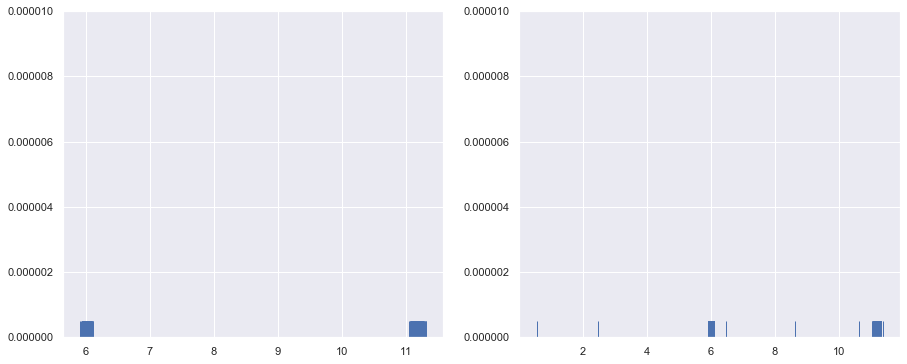

In [111]:
fig3, axes3 = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
# axes3[0].set_ylim([0,0.00001])
# axes3[1].set_ylim([0,0.00001])

sns.rugplot(ffx_cleaned["dT(seconds)"], ax=axes3[0])
sns.rugplot(ffx2_cleaned["dT(seconds)"], ax=axes3[1])

We see there are some clear outliers from the modes in the second dataset. I guess we'll try removing these to clean the data more...

We'll start with looking at a basic statistical histogram

Text(0.5, 1.0, 'first dataset')

Text(0.5, 1.0, 'second dataset')

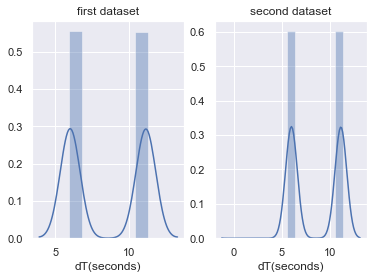

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.distplot(ffx_cleaned["dT(seconds)"], ax=axes[0])
sns.distplot(ffx2_cleaned["dT(seconds)"], ax=axes[1])

axes[0].set_title("first dataset")
axes[1].set_title("second dataset")

We can see some very obvious patterns here, namely that the data exhibits a bi-modal distribution! Let's isolate the data around each mode.

We start by extracting the modal data into a seperate dataframe, to make it easier to work with.

In [64]:
data1 = ffx_cleaned[["count", "dT(seconds)"]]
data2 = ffx2_cleaned[["count", "dT(seconds)"]]

df1_styler = data1.head().style.set_table_attributes("style='display:inline'").set_caption('Dataset 1')
df2_styler = data2.head().style.set_table_attributes("style='display:inline'").set_caption('Dataset 2')

display_html(df1_styler._repr_html_()+" .....  "+df2_styler._repr_html_(), raw=True)

,count,dT(seconds)
0,1,nan
1,2,6.004774
2,3,11.123151
3,4,5.974197
4,5,11.248352
,count,dT(seconds)
1,2,nan
2,3,6.040522
3,4,11.181126
4,5,6.039849


In [76]:
data1_small_mode = data1[data1["dT(seconds)"]<8]
data1_large_mode = data1[data1["dT(seconds)"]>8]

data2_small_mode = data2[data2["dT(seconds)"]<8]
data2_large_mode = data2[data2["dT(seconds)"]>8]

data1_small_styler = data1_small_mode.head().style.set_table_attributes("style='display:inline'").set_caption('Data1 small')
data1_large_styler = data1_large_mode.head().style.set_table_attributes("style='display:inline'").set_caption('Data1 large')
data2_small_styler = data2_small_mode.head().style.set_table_attributes("style='display:inline'").set_caption('Data2 small')
data2_large_styler = data2_large_mode.head().style.set_table_attributes("style='display:inline'").set_caption('Data2 large')

display_html(data1_small_styler._repr_html_()+" "+data1_large_styler._repr_html_()+" "+data2_small_styler._repr_html_()+" "+data2_large_styler._repr_html_(), raw=True)

,count,dT(seconds)
1,2,6.004774
3,4,5.974197
5,6,5.966099
7,8,5.983968
9,10,6.059533
,count,dT(seconds)
2,3,11.123151
4,5,11.248352
6,7,11.216055
8,9,11.190219


We can create box-and-whisker plots to see the quartiles???

Here are some histograms of the individual modes for each data set

(5.85, 6.15)

Text(0.5, 1, 'first dataset (small mode)')

Text(0.5, 1, 'first dataset (large mode)')

Text(0.5, 1, 'second dataset (small mode)')

Text(0.5, 1, 'second dataset (large mode)')

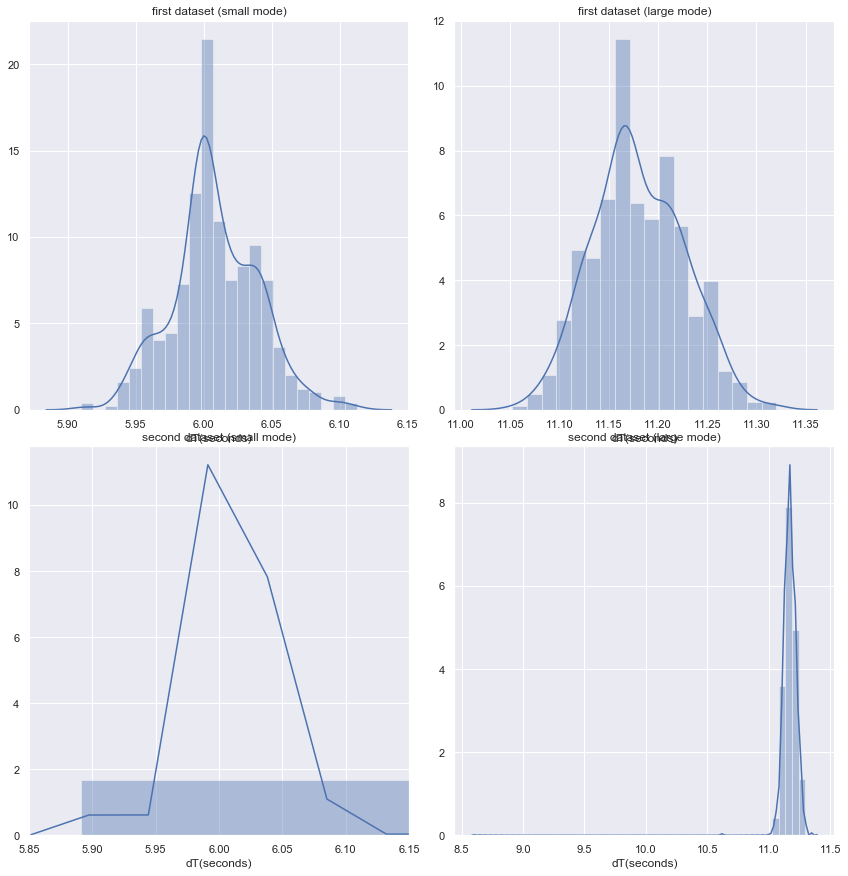

In [92]:
fig2, axes2 = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
plt.tight_layout()
# axes2

sns.distplot(data1_small_mode["dT(seconds)"], ax=axes2[0,0])
sns.distplot(data1_large_mode["dT(seconds)"], ax=axes2[0,1])
sns.distplot(data2_small_mode["dT(seconds)"], ax=axes2[1,0], bins=10)
sns.distplot(data2_large_mode["dT(seconds)"], ax=axes2[1,1])

# Need to specify domain for data2 for some reason...
axes2[1,0].set_xlim([5.85,6.15])


axes2[0,0].set_title("first dataset (small mode)")
axes2[0,1].set_title("first dataset (large mode)")
axes2[1,0].set_title("second dataset (small mode)")
axes2[1,1].set_title("second dataset (large mode)")

In [67]:
average_time = sum(y)/len(y)
average_time

NameError: name 'y' is not defined

In [ ]:
above_average = [time for time in y if time > average_time]
above_average[:5]
# len(above_average) #--> 558

In [ ]:
below_average = [time for time in y if time < average_time]
below_average[:5]
# len(below_average) #--> 559

In [ ]:
count_above = [count for (count, time) in zip(x,y) if time > average_time]
count_above # --> ALL EVEN NUMBERS!!
len(count_above)

In [ ]:
avg_of_above = sum(above_average)/len(above_average)
avg_of_above

In [ ]:
std_above = np.std(above_average)
std_above

In [ ]:
avg_of_below = sum(below_average)/len(below_average)
avg_of_below

In [ ]:
std_below = np.std(below_average)
std_below

In [ ]:
count_below = [count for (count, time) in zip(x,y) if time < average_time]
count_below # --> ALL EVEN NUMBERS!!
len(count_below)

In [ ]:
plt.scatter(count_above, above_average)

In [ ]:
plt.scatter(count_below, below_average)

In [ ]:
num_bins = 20
plt.hist(above_average, bins = num_bins)

In [ ]:
num_bins = 20
plt.hist(below_average, bins = num_bins)

In [ ]:
count_above[:5]

In [ ]:
def all_even_or_odd(array):

    remainders = list(map(lambda x: int(x[:-1]) % 2, array))
    
    if remainders.count(1) == len(array):
        return "The array contains all odd integers"
    elif remainders.count(0) == len(array):
        return "The array contains all even integers"
    else:
        return "The array contains both even and odd integers"

In [ ]:
all_even_or_odd(count_above)

In [ ]:
all_even_or_odd(count_below)